In [1]:
%matplotlib inline

In [2]:
import itertools 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
import numpy as np

# (scale, length, randomness).)
#plt.xkcd()
    
from papercolors import colordict as pcd

In [10]:
# tau 
d = [{'speed':'2.5 mph', 'direction':'4°' ,'signal':'stop', 'strength':4, 'color': 'r', 'shape': 's'}, 
     {'speed':'4 mph', 'direction':'1°', 'signal':'slow', 'strength':3, 'color': 'y', 'shape': '^'},
     {'speed':'1 mph', 'direction':'3°' ,'signal':'go', 'strength':5, 'color':'g', 'shape': 'H'}] 

In [11]:
d[0]

{'speed': '2.5 mph',
 'direction': '4°',
 'signal': 'stop',
 'strength': 4,
 'color': 'r',
 'shape': 's'}

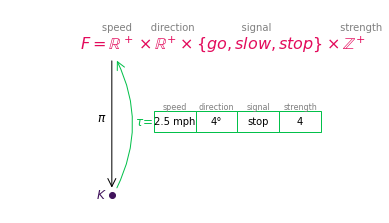

In [25]:
fig, ax = plt.subplots(figsize=(6,6))

rows = ['speed', 'direction', 'signal', 'strength']
ax.text(.35,.875, f"       {rows[0]}      {rows[1]}               {rows[2]}                      {rows[3]}", 
    fontsize=10, color='gray', ha='left', va='bottom')
ax.text(.35,.8, r"$F = \mathbb{R}^+\times\mathbb{R}^{+}\times \{go, slow, stop\}\times\mathbb{Z}^{+}$", 
    fontsize=16, color=pcd['fiber'], ha='left')
ax.scatter(.5, .1, color=pcd['base'])
ax.text(.475, .1, r"$K$", va='center', ha='right', color=pcd['base'], fontsize=12)

ax.text(.475,.45, r"$\pi$", ha='right', fontsize=12)
pi = mpatches.FancyArrowPatch((.5, .75),(.5, .125), arrowstyle='->', mutation_scale=20)
ax.add_artist(pi)

ax.text(.61,.45, r"$\tau$=", ha='left', va='center', fontsize=12, color=pcd['section'])
tau = mpatches.FancyArrowPatch((.52, .125), (.52, .75),
                           arrowstyle='->', connectionstyle='arc3,rad=.25',
                           mutation_scale=20, color=pcd['section'])
ax.add_artist(tau)


for i, (xi, r) in enumerate(zip([.8, 1, 1.2, 1.4], rows)):
    ax.text(xi, .45+.1/2, r, color='gray', ha='center', va='bottom', fontsize=8)
    ax.text(xi, .45, d[0][r], ha='center', va='center', fontsize=10)
    ax.add_patch(mpatches.Rectangle((xi-.2/2, .45-.1/2), .2, .1,  
                  facecolor='white', edgecolor=pcd['section']))

ax.set(xlim=(0,1.6), ylim=(0,1), aspect='equal')
ax.axis('off')
fig.savefig("../figures/fb_tau.png", dpi=300, bbox_inches='tight')

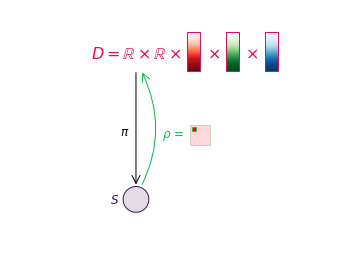

In [27]:
fig, ax = plt.subplots(figsize=(6,6))
ax.text(.325,.8, r"$D = \mathbb{R}\times\mathbb{R}$", fontsize=16, color=pcd['fiber'], ha='left')

#(left, right, bottom, top)
pad = .15
xc = .7
for cmap, xo in zip([plt.cm.Reds, plt.cm.Greens, plt.cm.Blues], np.array([xc, xc+pad, xc+pad*2])):
    ax.text(xo-pad/2, .8, r"$\times$", fontsize=16, color=pcd['fiber'])
    extents = [xo, xo+.05, .75, .9]
    im = ax.imshow(np.array([[0.,1.], [0.,1.]]).T, cmap = cmap, interpolation = 'bicubic', extent=extents)
    ax.add_patch(mpatches.Rectangle((extents[0], extents[2]), extents[1]-extents[0], extents[3]-extents[2], 
                                    facecolor='none', edgecolor=pcd['fiber']))
   
    
yb = .25
ax.add_patch(mpatches.Circle((.5, yb), .05, edgecolor=pcd['base'], 
                                    facecolor=mcolors.to_rgba(pcd['base'], alpha=.15)))
ax.text(.435, yb, r"$S$", va='center', ha='right', color=pcd['base'], fontsize=12)

ax.text(.475,.5, r"$\pi$", ha='right', fontsize=12)
pi = mpatches.FancyArrowPatch((.5, .75),(.5, yb+.05), arrowstyle='->', mutation_scale=20)
ax.add_artist(pi)
              
ax.text(.6,.5, r"$\rho$ =", ha='left', va='center', fontsize=12, color=pcd['section'])
ax.scatter(.75, .5, marker=d[0]['shape'], color=d[0]['color'], s=400, edgecolor='k', alpha=.15)
ax.scatter(.725, .525, marker=d[0]['shape'], color=d[0]['color'], s=10, 
           edgecolor=pcd['section'], linewidth=.75)

rho = mpatches.FancyArrowPatch((.52, yb+.05), (.52, .75),
                               arrowstyle='->', connectionstyle='arc3,rad=.25',
                               mutation_scale=20, color=pcd['section'])
ax.add_artist(rho)


ax.set(xlim=(0,1.3), ylim=(0,1), aspect='equal')
ax.axis('off')
fig.savefig("../figures/fb_rho.png", dpi=300, bbox_inches='tight')

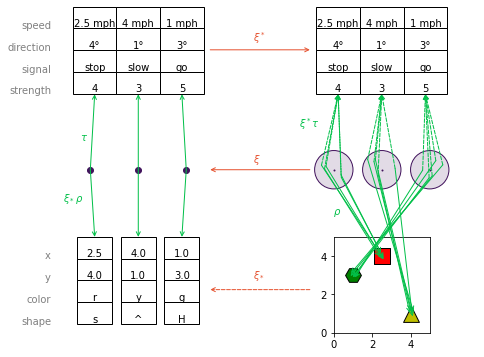

In [28]:
fig, axd = plt.subplot_mosaic([['tau', 'tau_pull'], ['k', 's'], ['rho_push', 'rho']], figsize=(8,6))
x = [-0, .5, 1]
y = [.5]*len(x)
# K
axd['k'].scatter(x,y, color=pcd['base'])
axd['k'].axis('off')
axd['k'].set(aspect='equal', ylim=(0, 1), xlim=(-.5, 1.5))

#S
radius = .2
axd['s'].scatter(x,y, color=pcd['base'], s=1)
[axd['s'].add_patch(mpatches.Circle((xi,yi), radius=radius, edgecolor=pcd['base'], 
                                    facecolor=mcolors.to_rgba(pcd['base'], alpha=.15)))
                     for xi, yi in zip(x, y)]
axd['s'].axis('off')
axd['s'].set(aspect='equal', ylim=(0, 1), xlim=(-.5, 1.5))


rows = ['speed', 'direction', 'signal', 'strength'][::-1]
for axn in ['tau', 'tau_pull']:
    for i, r in enumerate(rows):
        if axn =='tau':
            axd[axn].annotate(r, (-.5, i/len(rows)), ha='right', fontsize=10, color='gray')
        for xi, di in zip(x,d):
            axd[axn].annotate(di[r],(xi, i/len(rows)), ha='center', va='bottom', fontsize=10)
            axd[axn].add_patch(mpatches.Rectangle((xi-.25, i/len(rows)), .5, 1/len(rows), 
                                 facecolor='white', edgecolor='k'))


    axd[axn].set(xlim=(-.5, 1.5), ylim=(-.1,1), aspect='equal')

    axd[axn].axis('off')

for xi, yi, di in zip(x,y,d):
    xm = float(di['speed'].strip("mph"))
    ym = float(di['direction'].strip("°"))
    axd['rho'].scatter(xm,ym,c=di['color'], marker=di['shape'], s=250, edgecolor='k')
axd['rho'].set(xlim=(0, 5), ylim=(0,5), aspect='equal')


for i, r in enumerate(['speed', 'direction', 'color', 'shape'][::-1]):
    if r == 'speed':
        s = 'x'
    elif r == 'direction':
        s = 'y'
    else:
        s = r

    axd['rho_push'].annotate(s, (-.5, i/len(rows)), ha='right', fontsize=10, color='gray')
    for xi, di in zip(x,d):
        if r == 'speed':
            sv = float(di['speed'].strip("mph"))
        elif r == 'direction':
            sv = float(di['direction'].strip("°"))
        else:
            sv = di[r]
        axd['rho_push'].annotate(sv,(xi, i/len(rows)), ha='center', va='bottom', fontsize=10)
        axd['rho_push'].add_patch(mpatches.Rectangle((xi-.2, i/len(rows)), .4, 1/len(rows), 
                             facecolor='white', edgecolor='k'))

axd['rho_push'].axis('off')
axd['rho_push'].set(xlim=(-.5, 1.5), ylim=(-.1,1), aspect='equal')

for i, xi in enumerate(x):
    at = mpatches.ConnectionPatch((xi,.5), (xi, -.005), 
                                  coordsA=axd['k'].transData, coordsB=axd['tau'].transData,
                                  color=pcd['section'], arrowstyle="->",)
    arp = mpatches.ConnectionPatch((xi,.5), (xi, 1), 
                                  coordsA=axd['k'].transData, coordsB=axd['rho_push'].transData,
                                  color=pcd['section'], arrowstyle="->",)
    fig.add_artist(at)
    fig.add_artist(arp)
    
    margin = .2
    xm = float(d[i]['speed'].strip("mph"))
    ym = float(d[i]['direction'].strip("°"))
    xt = np.random.uniform(low = xm-margin, high = xm+margin, size=10)
    yt = np.random.uniform(low = ym-margin, high = ym+margin, size=10)
    for j, (xs,ys) in enumerate(zip(np.random.uniform(low=xi-radius+.05, high=xi+radius-.05, size=5),
                       np.random.uniform(low=.5-radius+.05, high=.5+radius-.05, size=5))):
        atp = mpatches.ConnectionPatch((xs,ys), (xi, -.005), 
                                  coordsA=axd['s'].transData, coordsB=axd['tau_pull'].transData,
                                  color=pcd['section'], arrowstyle="->",linestyle='--')
       
        ar = mpatches.ConnectionPatch((xs,ys), (xt[j], yt[j]), 
                                  coordsA=axd['s'].transData, coordsB=axd['rho'].transData,
                                  color=pcd['section'], arrowstyle="->",)
        fig.add_artist(atp)
        fig.add_artist(ar)  

fig.text(.2, .57, r'$\tau$', color=pcd['section'])
fig.text(.17, .43, r'$\xi_*\rho$', color=pcd['section'])
fig.text(.58, .6, r'$\xi^*\tau$', color=pcd['section'])
fig.text(.64, .4, r'$\rho$', color=pcd['section'])
        
fig.text(.5, .25, r"$\xi_*$", color=pcd['functor'])
push = mpatches.ConnectionPatch((-.25,-.75), (1.25, -.75), 
                                  coordsA=axd['s'].transData, coordsB=axd['k'].transData,
                                  color=pcd['functor'], arrowstyle="->",linestyle='--')
fig.add_artist(push)

fig.text(.5, .8, r"$\xi^*$", color=pcd['functor'])
pull = mpatches.ConnectionPatch((1.25, 1.75), (-.25, 1.75), 
                                  coordsA=axd['k'].transData, coordsB=axd['s'].transData,
                                  color=pcd['functor'], arrowstyle="->")
fig.add_artist(pull)
fig.text(.5, .52, r"$\xi$", color=pcd['functor'])
vind = mpatches.ConnectionPatch((-.25,.5), (1.25, .5), 
                                  coordsA=axd['s'].transData, coordsB=axd['k'].transData,
                                  color=pcd['functor'], arrowstyle="->")
fig.add_artist(vind)
    
fig.savefig('../figures/xi_scatter.png', dpi=500, bbox_inches='tight')